<a href="https://colab.research.google.com/github/mehtamishah/Finding-Clusters-in-Mall-Customers/blob/main/mc_kmeansclustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
X = dataset.iloc[:, [3, 4]].to_numpy()

In [ ]:
# #One Hot Encoding
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder, StandardScaler
# ct = ColumnTransformer(transformers = ('encoder', OneHotEncoder, [0]), remainder = 'passthrough')
# X[0] = ct.fit_transform(X)
# #Feature Scaling ?
# sc = StandardScaler()
# X = sc.fit_transform(X)

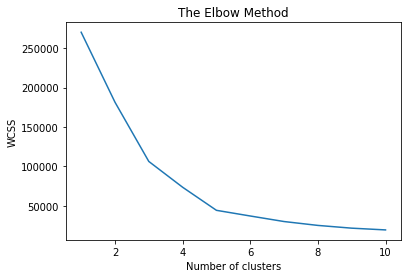

In [ ]:
# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [ ]:
print(type(y_kmeans))
print(y_kmeans)

<class 'numpy.ndarray'>
[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 1 3 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 4 2 1 2 4 2 4 2 1 2 4 2 4 2 4 2 4 2 1 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


In [ ]:
# y_kmeans = y_kmeans.reshape(len(y_kmeans), 1)
# np.concatenate((X, y_kmeans), axis = 1)

array([[ 15,  39,   3],
       [ 15,  81,   0],
       [ 16,   6,   3],
       [ 16,  77,   0],
       [ 17,  40,   3],
       [ 17,  76,   0],
       [ 18,   6,   3],
       [ 18,  94,   0],
       [ 19,   3,   3],
       [ 19,  72,   0],
       [ 19,  14,   3],
       [ 19,  99,   0],
       [ 20,  15,   3],
       [ 20,  77,   0],
       [ 20,  13,   3],
       [ 20,  79,   0],
       [ 21,  35,   3],
       [ 21,  66,   0],
       [ 23,  29,   3],
       [ 23,  98,   0],
       [ 24,  35,   3],
       [ 24,  73,   0],
       [ 25,   5,   3],
       [ 25,  73,   0],
       [ 28,  14,   3],
       [ 28,  82,   0],
       [ 28,  32,   3],
       [ 28,  61,   0],
       [ 29,  31,   3],
       [ 29,  87,   0],
       [ 30,   4,   3],
       [ 30,  73,   0],
       [ 33,   4,   3],
       [ 33,  92,   0],
       [ 33,  14,   3],
       [ 33,  81,   0],
       [ 34,  17,   3],
       [ 34,  73,   0],
       [ 37,  26,   3],
       [ 37,  75,   0],
       [ 38,  35,   3],
       [ 38,  92

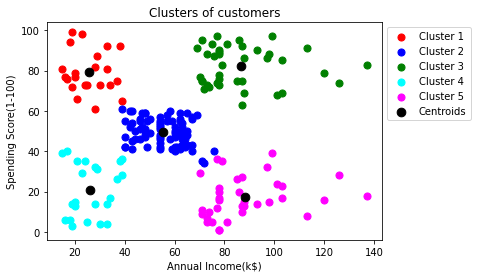

In [ ]:
#Visualization
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, color='blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, color='green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 50, color='cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 50, color='magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 75, color='black', label = 'Centroids')
plt.ylabel('Spending Score(1-100)')
plt.xlabel('Annual Income(k$)')
plt.title('Clusters of customers')
plt.legend(bbox_to_anchor=(1, 1), loc = 'upper left')
plt.show()